# Titanic - Machine Learning from Disaster (Kaggle)
https://www.kaggle.com/c/titanic/overview

In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#read in the data
train_path = r'./Data/train.csv'
test_path = r'./Data/test.csv'

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.shape

(891, 12)

In [8]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


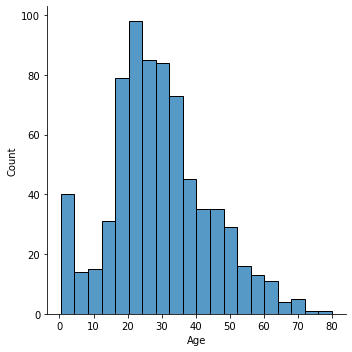

In [10]:
sns.displot(train.Age)

In [11]:
#impute missing ages with the mean 
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [12]:
#drop Cabin since there are 687 missing values from 891 rows - not enough information to impute with 
train.drop(columns = 'Cabin', inplace=True)

In [13]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
train = train[train['Embarked'].notnull()]

In [15]:
train.shape

(889, 11)

In [16]:
#one hot encode Sex
gender_dummies = pd.get_dummies(train.Sex, prefix = 'gender', drop_first=True)

train_2 = pd.concat([train, gender_dummies], axis =1)
test_2 = pd.concat([test, gender_dummies], axis =1)

In [17]:
#one hot encode embarked
embarked_dummies = pd.get_dummies(train.Embarked, prefix = 'embarked', drop_first=True)

train_2 = pd.concat([train_2, embarked_dummies], axis =1)
test_2 = pd.concat([test_2, embarked_dummies], axis =1)

<AxesSubplot:>

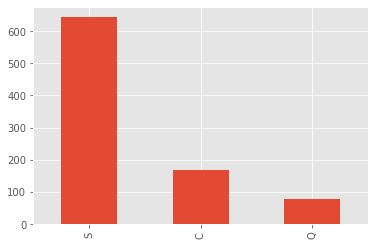

In [18]:
plt.style.use('ggplot')
train['Embarked'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

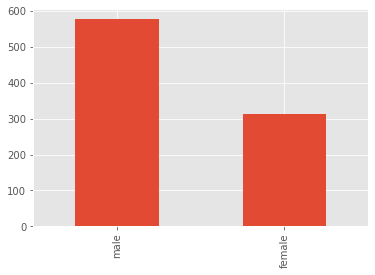

In [19]:

train['Sex'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'Distribution of ticket prices')

<Figure size 288x288 with 0 Axes>

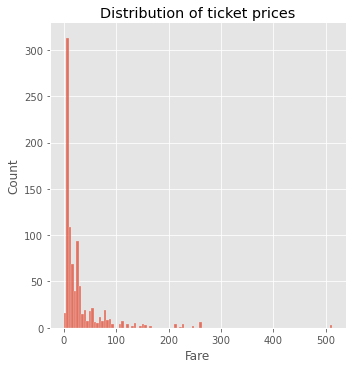

In [20]:
plt.figure(figsize=(4,4))

sns.displot(train['Fare'])
plt.title('Distribution of ticket prices')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

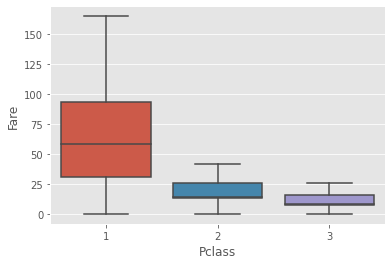

In [21]:
sns.boxplot(y=train['Fare'], x=train['Pclass'], showfliers=False)

In [22]:
train_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_male,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Building a Logistic Regression

In [64]:
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'gender_male', 'embarked_Q', 'embarked_S']
X_train = train_2[feature_cols]
y_train = train_2['Survived']

X_test = test_2[feature_cols]

In [67]:
## split Train set into a Train and Validation set 
#create train and test splits
X_train_t, X_train_val, y_train_t, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state = 99)

In [68]:
print(y_train_val.shape)
print(y_train_t.shape)

(267,)
(622,)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [69]:
lr.fit(X_train_t, y_train_t)

C:\Users\hmalek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [70]:
y_pred_train = lr.predict(X_train_t)
y_pred_val = lr.predict(X_train_val)

In [71]:
score_train = lr.score(X_train_t, y_train_t)
print(score)
score_val = lr.score(X_train_val, y_train_val)
print(score_val)

0.9820022497187851
0.7415730337078652


In [48]:
from sklearn.metrics import accuracy_score
y_train.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [73]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_true=y_train_t, y_pred=lr.predict(X_train_t))

array([[338,  48],
       [ 64, 172]], dtype=int64)

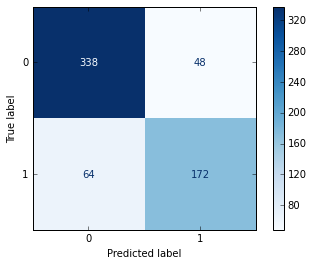

In [74]:
plot_confusion_matrix(lr, X_train_t, y_train_t, cmap='Blues')

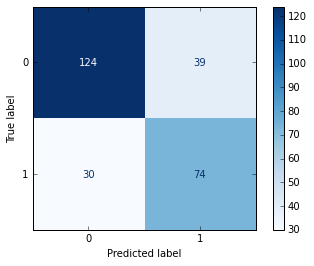

In [75]:
plot_confusion_matrix(lr, X_train_val, y_train_val, cmap='Blues')

In [80]:
print("ROC AUC Score Train set: {}".format(metrics.roc_auc_score(y_train_t,y_pred_train)))
print("ROC AUC Score Validation set: {}".format(metrics.roc_auc_score(y_train_val,y_pred_val)))

ROC AUC Score Train set: 0.8022306138579081
ROC AUC Score Validation set: 0.7361373289287401


In [82]:
print("Accuracy Score Train set: {}".format(metrics.accuracy_score(y_train_t,y_pred_train)))
print("Accuracy Score Validation set: {}".format(metrics.accuracy_score(y_train_val,y_pred_val)))

Accuracy Score Train set: 0.819935691318328
Accuracy Score Validation set: 0.7415730337078652


The model seems to be overfit on the training data

In [81]:
name = X_train_t.columns

coef = lr.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,Age,-0.0510672
1,SibSp,-0.42273
2,Parch,-0.021247
3,Fare,0.00136192
4,Pclass,-1.10233
5,gender_male,-2.80794
6,embarked_Q,0.0654948
7,embarked_S,-0.244212


### Building a Decision Tree Classifier

In [83]:
# Fit a classification tree with max_depth=3 on all data.
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train_t, y_train_t)

DecisionTreeClassifier(max_depth=3, random_state=1)

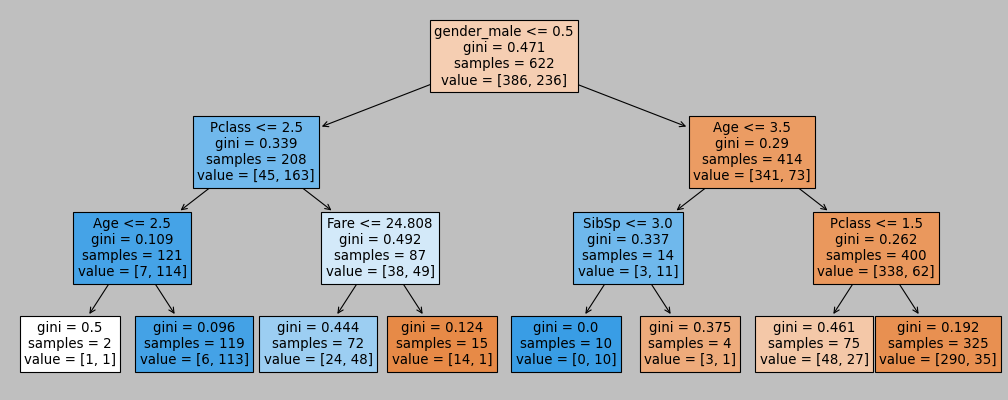

In [84]:
plt.style.use('classic')
from sklearn.tree import plot_tree

fig, ax = plt.subplots(1,1, figsize=(16,6)) 
plot_tree(treeclf, feature_names=feature_cols, fontsize=12, filled=True);

<AxesSubplot:xlabel='feature'>

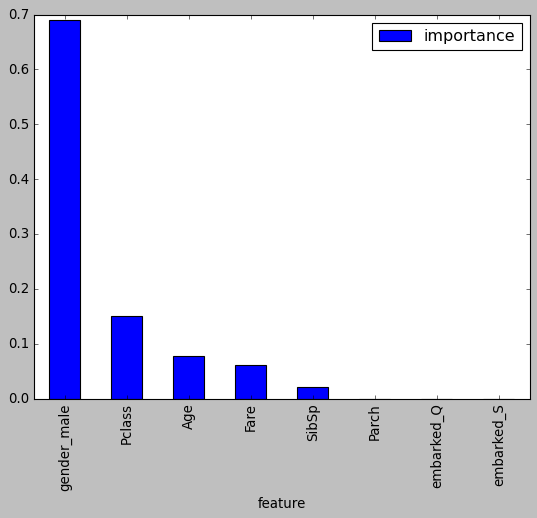

In [85]:
feature_importance = pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})
feature_importance.sort_values(by='importance', ascending = False).plot(x='feature', y = 'importance', kind='bar')

In [86]:
y_pred_train = treeclf.predict(X_train_t)
y_pred_val = treeclf.predict(X_train_val)
score = treeclf.score(X_train_t, y_train_t)
print(score)

score_val = treeclf.score(X_train_val, y_train_val)
print(score_val)

0.8472668810289389
0.7565543071161048


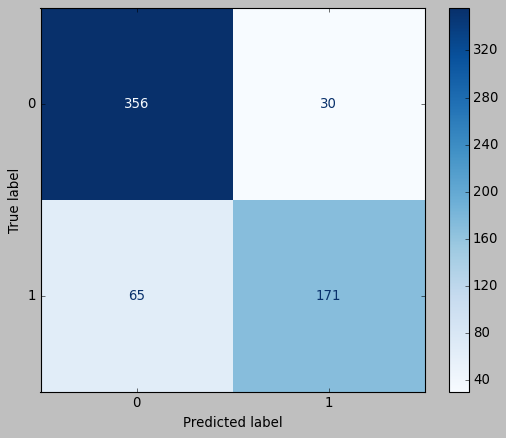

In [87]:
plot_confusion_matrix(treeclf, X_train_t, y_train_t, cmap='Blues')

In [88]:
print("ROC AUC Score Train set: {}".format(metrics.roc_auc_score(y_train_t,y_pred_train)))
print("ROC AUC Score Validation set: {}".format(metrics.roc_auc_score(y_train_val,y_pred_val)))
print("Accuracy Score Train set: {}".format(metrics.accuracy_score(y_train_t,y_pred_train)))
print("Accuracy Score Validation set: {}".format(metrics.accuracy_score(y_train_val,y_pred_val)))

ROC AUC Score Train set: 0.8234280319662773
ROC AUC Score Validation set: 0.7397062293534685
Accuracy Score Train set: 0.8472668810289389
Accuracy Score Validation set: 0.7565543071161048


The Decision Tree model still seems to be overfit to the training data however our validation scores are slightly better than the Logistic Regression model

### Building a Random Forest Classifier

In [102]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_t,y_train_t)

#y_pred=clf.predict(X_test)
y_pred_train = clf.predict(X_train_t)
y_pred_val = clf.predict(X_train_val)

In [103]:
print("ROC AUC Score Train set: {}".format(metrics.roc_auc_score(y_train_t,y_pred_train)))
print("ROC AUC Score Validation set: {}".format(metrics.roc_auc_score(y_train_val,y_pred_val)))
print("Accuracy Score Train set: {}".format(metrics.accuracy_score(y_train_t,y_pred_train)))
print("Accuracy Score Validation set: {}".format(metrics.accuracy_score(y_train_val,y_pred_val)))

ROC AUC Score Train set: 0.9855207692983226
ROC AUC Score Validation set: 0.7510618216139688
Accuracy Score Train set: 0.9871382636655949
Accuracy Score Validation set: 0.7640449438202247


In [104]:
# gives same result 
score = clf.score(X_train_t, y_train_t)
print(score)
score_val = clf.score(X_train_val, y_train_val)
print(score_val)

0.9871382636655949
0.7640449438202247


No handles with labels found to put in legend.


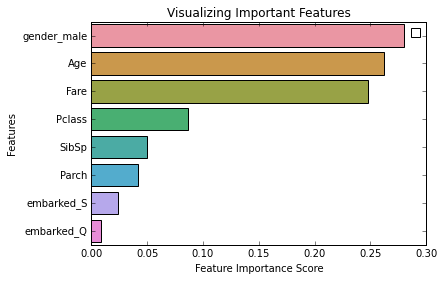

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp


# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

<AxesSubplot:xlabel='feature'>

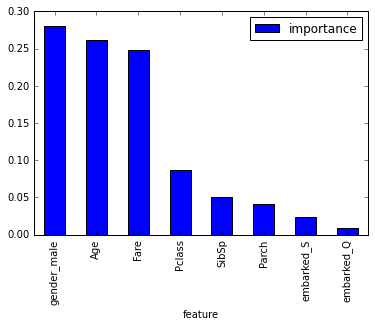

In [106]:
#alternative feature importance chart
feature_importance = pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_})
feature_importance.sort_values(by='importance', ascending = False).plot(x='feature', y = 'importance', kind='bar')

Let's try and improve this Random Forest model by tuning the hyperparameters in search of the model resulting in the best accuracy score. I'll use GridSearchCV to do this as it allows you to tune all hyperparameters at once, in combination with one another, rather than choosing one at a time. This will also help reduce overfitting as we have seen in our current Random Forest model as the Validation set Accuracy is a lot lower than the Train set Accuracy. 

In [110]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=1)

n_estimators = [1000]
max_depth = [3,4,5,6]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [5, 8, 10, 12] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_t, y_train_t)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.5min finished


In [111]:
gridF.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=5, n_estimators=1000,
                       random_state=1)

In [113]:
gridF.best_score_

0.8505032258064515

In [114]:
y_pred_train = gridF.predict(X_train_t)
y_pred_val = gridF.predict(X_train_val)

In [115]:
print("ROC AUC Score Train set: {}".format(metrics.roc_auc_score(y_train_t,y_pred_train)))
print("ROC AUC Score Validation set: {}".format(metrics.roc_auc_score(y_train_val,y_pred_val)))
print("Accuracy Score Train set: {}".format(metrics.accuracy_score(y_train_t,y_pred_train)))
print("Accuracy Score Validation set: {}".format(metrics.accuracy_score(y_train_val,y_pred_val)))

ROC AUC Score Train set: 0.8244928427153771
ROC AUC Score Validation set: 0.7428621991505427
Accuracy Score Train set: 0.8536977491961415
Accuracy Score Validation set: 0.7752808988764045


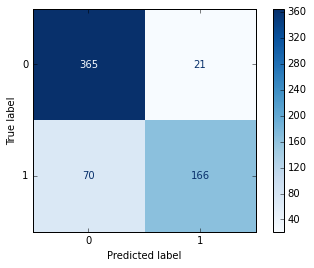

In [117]:
plot_confusion_matrix(gridF, X_train_t, y_train_t, cmap='Blues')

In [118]:
score = gridF.score(X_train_t, y_train_t)
print(score)
score_val = gridF.score(X_train_val, y_train_val)
print(score_val)

0.8536977491961415
0.7752808988764045


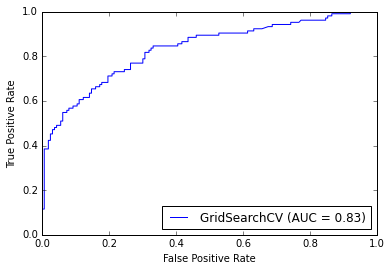

In [123]:
metrics.plot_roc_curve(gridF, X_train_val, y_train_val)  